<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(0_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.001213,39.786313,32.471043,1.774779,125.033348,123.718327,1.315021
1,0.0,1.0,36.173569,39.505096,65.642118,3.459976,154.780758,151.800214,2.980544
2,0.0,2.0,72.922526,81.218589,60.037261,-8.810394,215.367981,223.993002,-8.625021
3,0.0,3.0,77.075675,77.580317,92.918399,-7.145393,250.428997,257.167109,-6.738111
4,0.0,4.0,28.741757,58.220659,30.905493,-0.858858,127.009050,128.740872,-1.731822
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,26.193313,64.536879,52.461618,-1.260982,151.930828,152.413475,-0.482647
249996,999.0,246.0,76.063044,24.814174,28.596930,5.687287,145.161436,138.343135,6.818301
249997,999.0,247.0,28.234526,48.871646,48.189443,2.901836,138.197451,134.542515,3.654937
249998,999.0,248.0,74.272499,80.722513,93.433665,5.297586,263.726265,257.819021,5.907244


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.001213,39.786313,32.471043,1.774779,125.033348,123.718327,1.315021
1,0.0,1.0,36.173569,39.505096,65.642118,3.459976,154.780758,151.800214,2.980544
2,0.0,2.0,72.922526,81.218589,60.037261,-8.810394,215.367981,223.993002,-8.625021
3,0.0,3.0,77.075675,77.580317,92.918399,-7.145393,250.428997,257.167109,-6.738111
4,0.0,4.0,28.741757,58.220659,30.905493,-0.858858,127.009050,128.740872,-1.731822
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,26.193313,64.536879,52.461618,-1.260982,151.930828,152.413475,-0.482647
249996,999.0,246.0,76.063044,24.814174,28.596930,5.687287,145.161436,138.343135,6.818301
249997,999.0,247.0,28.234526,48.871646,48.189443,2.901836,138.197451,134.542515,3.654937
249998,999.0,248.0,74.272499,80.722513,93.433665,5.297586,263.726265,257.819021,5.907244


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.001213  39.786313  32.471043  1.774779  125.033348   
      1.0    36.173569  39.505096  65.642118  3.459976  154.780758   
      2.0    72.922526  81.218589  60.037261 -8.810394  215.367981   
      3.0    77.075675  77.580317  92.918399 -7.145393  250.428997   
      4.0    28.741757  58.220659  30.905493 -0.858858  127.009050   
...                ...        ...        ...       ...         ...   
999.0 245.0  26.193313  64.536879  52.461618 -1.260982  151.930828   
      246.0  76.063044  24.814174  28.596930  5.687287  145.161436   
      247.0  28.234526  48.871646  48.189443  2.901836  138.197451   
      248.0  74.272499  80.722513  93.433665  5.297586  263.726265   
      249.0  37.096434  22.356278  31.881752  4.550160  105.884624   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    123.718327  1.315021  
      1.0    151.800214  2.980544  
      2.0    223.993002 -8.625021  
      3.0    257.167109 -6.738111  
      4.0    128.740872 -1.731822  
...                 ...       ...  
999.0 245.0  152.413475 -0.482647  
      246.0  138.343135  6.818301  
      247.0  134.542515  3.654937  
      248.0  257.819021  5.907244  
      249.0  100.476588  5.408037  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.001213  39.786313  32.471043  1.774779  125.033348   
      1.0    36.173569  39.505096  65.642118  3.459976  154.780758   
      2.0    72.922526  81.218589  60.037261 -8.810394  215.367981   
      3.0    77.075675  77.580317  92.918399 -7.145393  250.428997   
      4.0    28.741757  58.220659  30.905493 -0.858858  127.009050   
...                ...        ...        ...       ...         ...   
999.0 245.0  26.193313  64.536879  52.461618 -1.260982  151.930828   
      246.0  76.063044  24.814174  28.596930  5.687287  145.161436   
      247.0  28.234526  48.871646  48.189443  2.901836  138.197451   
      248.0  74.272499  80.722513  93.433665  5.297586  263.726265   
      249.0  37.096434  22.356278  31.881752  4.550160  105.884624   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    123.718327  1.315021  
      1.0    151.800214  2.980544  
      2.0    223.993002 -8.625021  
      3.0    257.167109 -6.738111  
      4.0    128.740872 -1.731822  
...                 ...       ...  
999.0 245.0  152.413475 -0.482647  
      246.0  138.343135  6.818301  
      247.0  134.542515  3.654937  
      248.0  257.819021  5.907244  
      249.0  100.476588  5.408037  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.001213,39.786313,32.471043,1.774779,125.033348,123.718327,1.315021
1,0.0,1.0,36.173569,39.505096,65.642118,3.459976,154.780758,151.800214,2.980544
2,0.0,2.0,72.922526,81.218589,60.037261,-8.810394,215.367981,223.993002,-8.625021
3,0.0,3.0,77.075675,77.580317,92.918399,-7.145393,250.428997,257.167109,-6.738111
4,0.0,4.0,28.741757,58.220659,30.905493,-0.858858,127.009050,128.740872,-1.731822
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,26.193313,64.536879,52.461618,-1.260982,151.930828,152.413475,-0.482647
249996,999.0,246.0,76.063044,24.814174,28.596930,5.687287,145.161436,138.343135,6.818301
249997,999.0,247.0,28.234526,48.871646,48.189443,2.901836,138.197451,134.542515,3.654937
249998,999.0,248.0,74.272499,80.722513,93.433665,5.297586,263.726265,257.819021,5.907244


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.001213  39.786313  32.471043  1.774779  125.033348   
      1.0    36.173569  39.505096  65.642118  3.459976  154.780758   
      2.0    72.922526  81.218589  60.037261 -8.810394  215.367981   
      3.0    77.075675  77.580317  92.918399 -7.145393  250.428997   
      4.0    28.741757  58.220659  30.905493 -0.858858  127.009050   
...                ...        ...        ...       ...         ...   
999.0 245.0  26.193313  64.536879  52.461618 -1.260982  151.930828   
      246.0  76.063044  24.814174  28.596930  5.687287  145.161436   
      247.0  28.234526  48.871646  48.189443  2.901836  138.197451   
      248.0  74.272499  80.722513  93.433665  5.297586  263.726265   
      249.0  37.096434  22.356278  31.881752  4.550160  105.884624   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    123.718327  1.315021  
      1.0    151.800214  2.980544  
      2.0    223.993002 -8.625021  
      3.0    257.167109 -6.738111  
      4.0    128.740872 -1.731822  
...                 ...       ...  
999.0 245.0  152.413475 -0.482647  
      246.0  138.343135  6.818301  
      247.0  134.542515  3.654937  
      248.0  257.819021  5.907244  
      249.0  100.476588  5.408037  

[250000 rows x 7 columns]

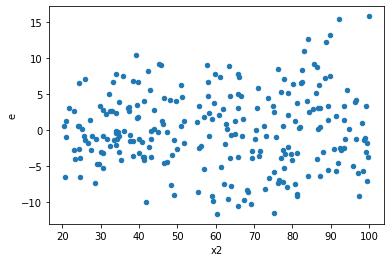

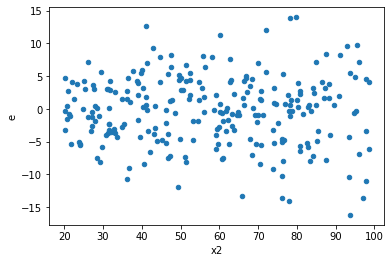

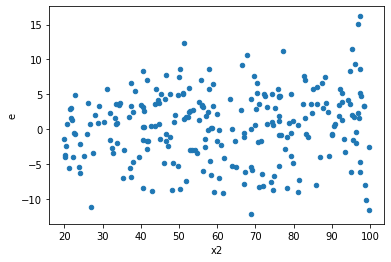

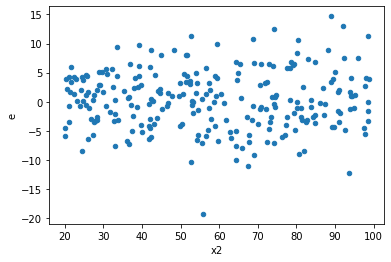

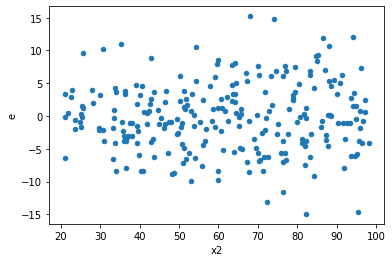

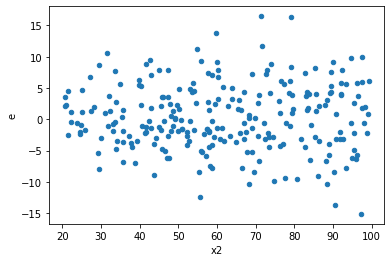

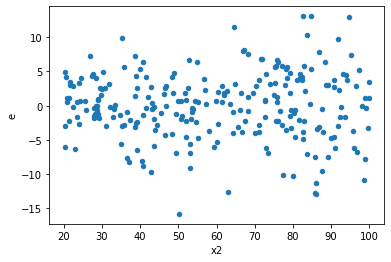

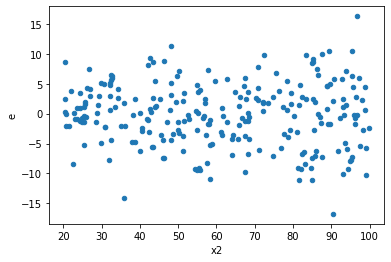

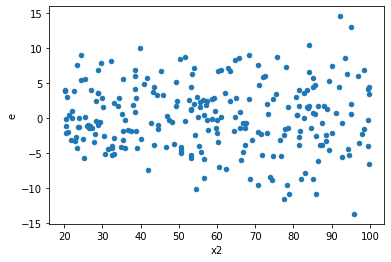

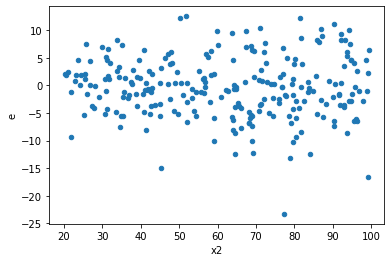

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,2030.2428168798353,3392.108153608746,20.930338318348817,34.970187150605625,1.67078938805058,0.012156024938156262,0.9939219875309219,0.006078012469078131,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,2540.518766021263,3415.797477186718,26.19091511362127,35.21440698130637,1.3445275519598854,0.146653581998627,0.9266732090006865,0.0733267909993135,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,1850.8468914137934,3208.554564010554,19.080895787771066,33.07788210320159,1.7335602306680582,0.007239510324128506,0.9963802448379357,0.003619755162064253,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1707.2173743274482,3266.351563422244,17.600179116777817,33.67372745796128,1.9132604977787382,0.001580101523490418,0.9992099492382548,0.000790050761745209,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,2051.2884643607003,3097.678830553979,21.14730375629588,31.934833304680197,1.510113708712048,0.043646376382593166,0.9781768118087034,0.021823188191296583,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,2087.1964557355946,3232.856130581263,21.517489234387572,33.32841371733261,1.5488988215255959,0.032302194915343696,0.9838489025423282,0.016151097457671848,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1870.5014173791185,2602.174667462457,19.283519766795035,26.826542963530482,1.3911642318392539,0.10567964035290012,0.9471601798235499,0.05283982017645006,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,2124.2528140906907,3155.9505363609737,21.89951354732671,32.53557253980385,1.4856755822220304,0.05260646060272123,0.9736967696986394,0.026303230301360614,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,1612.3239392734301,2826.93469769244,16.621896281169384,29.143656677241648,1.753329234177566,0.006138800769561081,0.9969305996152195,0.0030694003847805407,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,2030.2428168798353,3392.108153608746,20.930338318348817,34.970187150605625,1.67078938805058,0.012156024938156262,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,2540.518766021263,3415.797477186718,26.19091511362127,35.21440698130637,1.3445275519598854,0.146653581998627,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,1850.8468914137934,3208.554564010554,19.080895787771066,33.07788210320159,1.7335602306680582,0.007239510324128506,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1707.2173743274482,3266.351563422244,17.600179116777817,33.67372745796128,1.9132604977787382,0.001580101523490418,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,2051.2884643607003,3097.678830553979,21.14730375629588,31.934833304680197,1.510113708712048,0.043646376382593166,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,2087.1964557355946,3232.856130581263,21.517489234387572,33.32841371733261,1.5488988215255959,0.032302194915343696,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1870.5014173791185,2602.174667462457,19.283519766795035,26.826542963530482,1.3911642318392539,0.10567964035290012,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,2124.2528140906907,3155.9505363609737,21.89951354732671,32.53557253980385,1.4856755822220304,0.05260646060272123,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,1612.3239392734301,2826.93469769244,16.621896281169384,29.143656677241648,1.753329234177566,0.006138800769561081,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      596
Reject005=0 : Heteroscedasticity    404
Name: Result_test, dtype: int64